In [1]:
import sys
from pathlib import Path
import os
import matplotlib.pyplot as plt

# specify the source and main folder path 
CSGO_MAIN_DIR = Path(os.getcwd()).parent
CSGO_SRC_DIR = os.path.join(CSGO_MAIN_DIR, 'src')

# adding source code path
sys.path.append(CSGO_SRC_DIR)
import models

from models import CSGO

## STOP. Make sure your `src/pretrained_weights` have both the UNet and YOLO weights. To download these weights please refer to the README document.

In [2]:
yolo_path = os.path.join(CSGO_SRC_DIR, 'pretrained_weights', 'lung_best.float16.torchscript.pt')
unet_path = os.path.join(CSGO_SRC_DIR, 'pretrained_weights', 'epoch_190.pt')

# initialize CSGO with the two required model weights
seg_model = CSGO(yolo_path=yolo_path, unet_path=unet_path)

In [3]:
img_path = os.path.join(CSGO_MAIN_DIR, 'example_patches', 'TCGA-UB-AA0V-01Z-00-DX1.FB59AF14-B425-488D-94FD-E999D4057468.png')
result = seg_model.segment(img_path=img_path, cell_size=40, img_resolution=40)

Inference time: 0.9444797039031982 s


/project/DPDS/Xiao_lab/shared/deep_learning_SW_RR/envs/cellseg-yolo/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


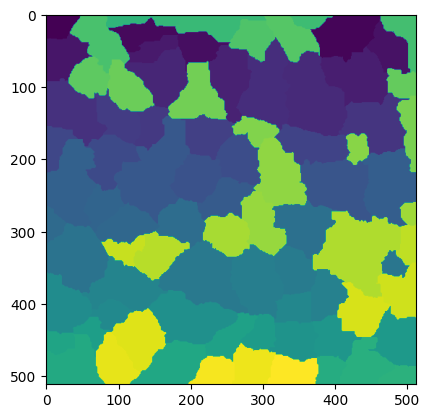

In [4]:
plt.imshow(result)

## Visualize the pipeline and save the results if desired

Inference time: 0.976158857345581 s


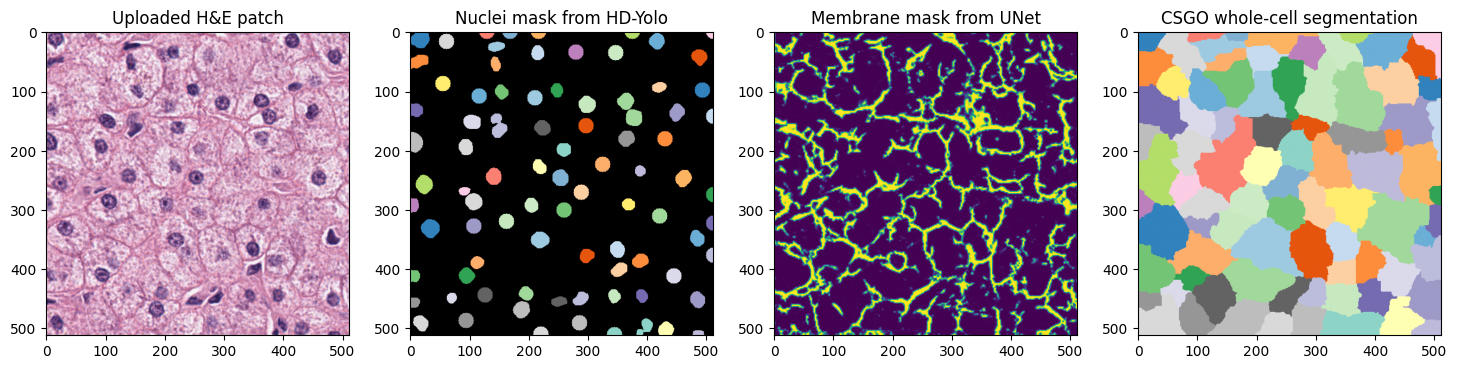

In [5]:
seg_model = CSGO(yolo_path=yolo_path, unet_path=unet_path, save=True, output_dir='./')
result = seg_model.segment(img_path=img_path, cell_size=40, img_resolution=40)